# Exploratory analysis of tech meetups in Madison, WI

- [Which meetups have the most members?](#Which-meetups-have-the-most-members?)
- [Which meetups have the most events?](#Which-meetups-have-the-most-events?)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from madison_meetups import get_madison_tech_groups, get_group_events

%matplotlib inline

Load DataFrame with Madison tech meetup information

In [2]:
madison_tech_groups = get_madison_tech_groups()

29/30 (10 seconds remaining)


In [3]:
madison_tech_groups.columns

Index(['category', 'city', 'country', 'created', 'description', 'group_photo',
       'id', 'join_mode', 'lat', 'link', 'lon', 'members', 'name', 'organizer',
       'rating', 'state', 'timezone', 'topics', 'urlname', 'utc_offset',
       'visibility', 'who'],
      dtype='object')

## Which meetups have the most members?

In [4]:
membership_df = madison_tech_groups.sort_values('members', ascending=True)[['name', 'members']]
membership_df.head()

,name,members
41,Madison ABODO Meetup,3
68,Madison ServiceNow Meetup,7
67,iOS Developers / Swift Learners,11
62,Analytics At Speed Madison,14
46,Madison Web Design With Adobe Muse Meetup,15


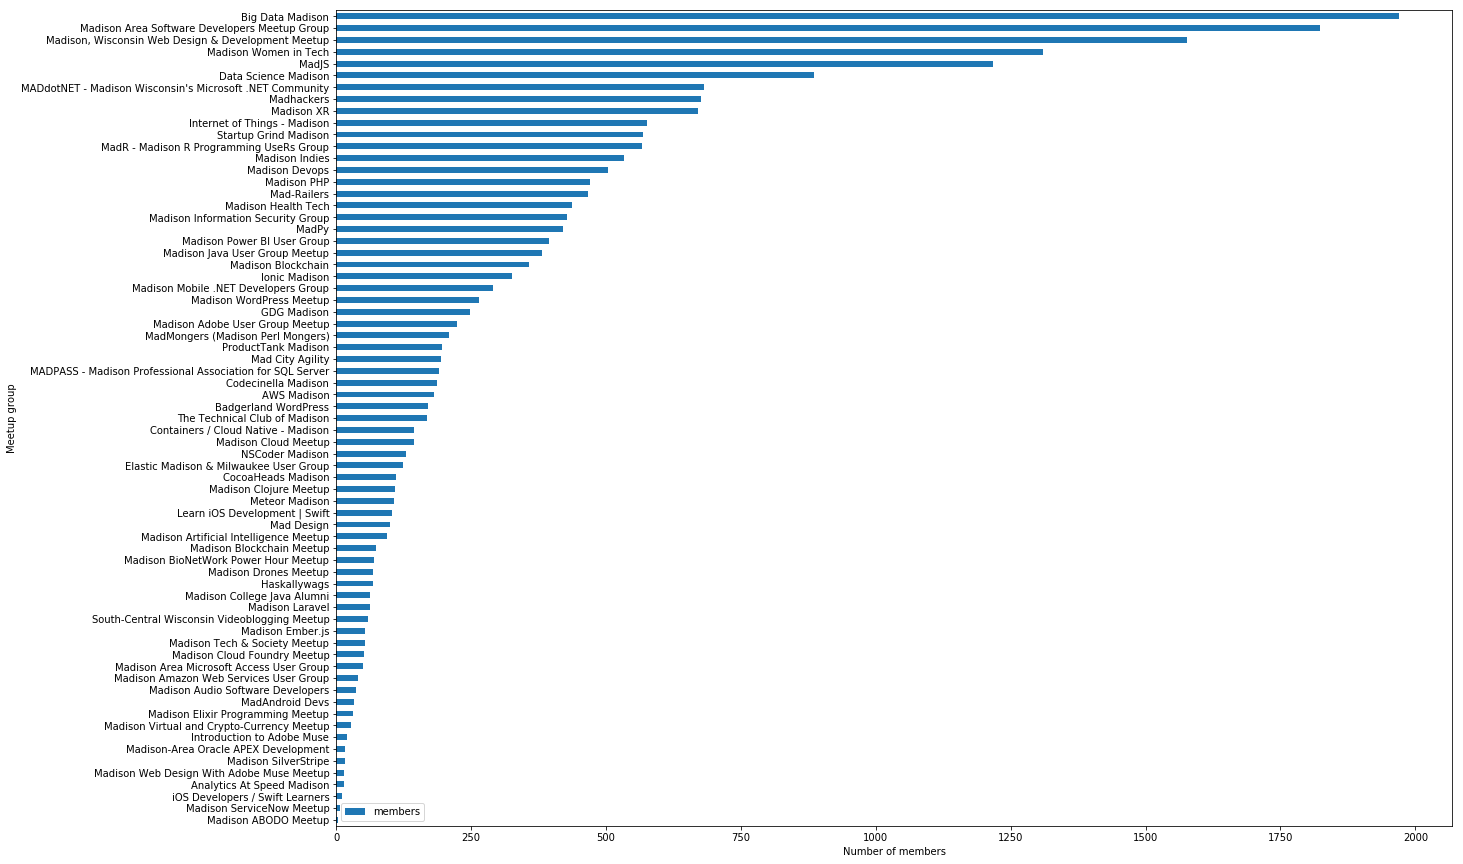

In [5]:
fig, ax = plt.subplots(figsize=(20, 15))
membership_df.set_index('name').plot(kind='barh', ax=ax)
ax.set_xlabel('Number of members')
ax.set_ylabel('Meetup group')
plt.show()

## Which meetups have the most events?

In [6]:
group_events = madison_tech_groups.id.apply(get_group_events)
group_events = pd.concat(list(group_events), ignore_index=True)

28/30 (8 seconds remaining)
27/30 (7 seconds remaining)
26/30 (6 seconds remaining)
25/30 (6 seconds remaining)
24/30 (6 seconds remaining)
23/30 (6 seconds remaining)
22/30 (5 seconds remaining)
21/30 (5 seconds remaining)
20/30 (4 seconds remaining)
19/30 (4 seconds remaining)
18/30 (3 seconds remaining)
17/30 (3 seconds remaining)
16/30 (3 seconds remaining)
15/30 (2 seconds remaining)
14/30 (1 seconds remaining)
13/30 (1 seconds remaining)
12/30 (1 seconds remaining)
11/30 (1 seconds remaining)
29/30 (10 seconds remaining)
28/30 (10 seconds remaining)
27/30 (10 seconds remaining)
26/30 (9 seconds remaining)
25/30 (9 seconds remaining)
24/30 (9 seconds remaining)
23/30 (9 seconds remaining)
22/30 (9 seconds remaining)
21/30 (8 seconds remaining)
20/30 (8 seconds remaining)
19/30 (8 seconds remaining)
18/30 (8 seconds remaining)
17/30 (8 seconds remaining)
16/30 (7 seconds remaining)
15/30 (7 seconds remaining)
14/30 (7 seconds remaining)
13/30 (7 seconds remaining)
12/30 (7 seconds 

In [7]:
group_events.group[0]

{'created': 1179152529000,
 'group_lat': 43.08000183105469,
 'group_lon': -89.37999725341797,
 'id': 501101,
 'join_mode': 'open',
 'name': 'MadMongers (Madison Perl Mongers)',
 'urlname': 'madmongers',
 'who': 'Mongers'}

In [8]:
group_events['name'] = group_events.group.apply(lambda d: d['name'])

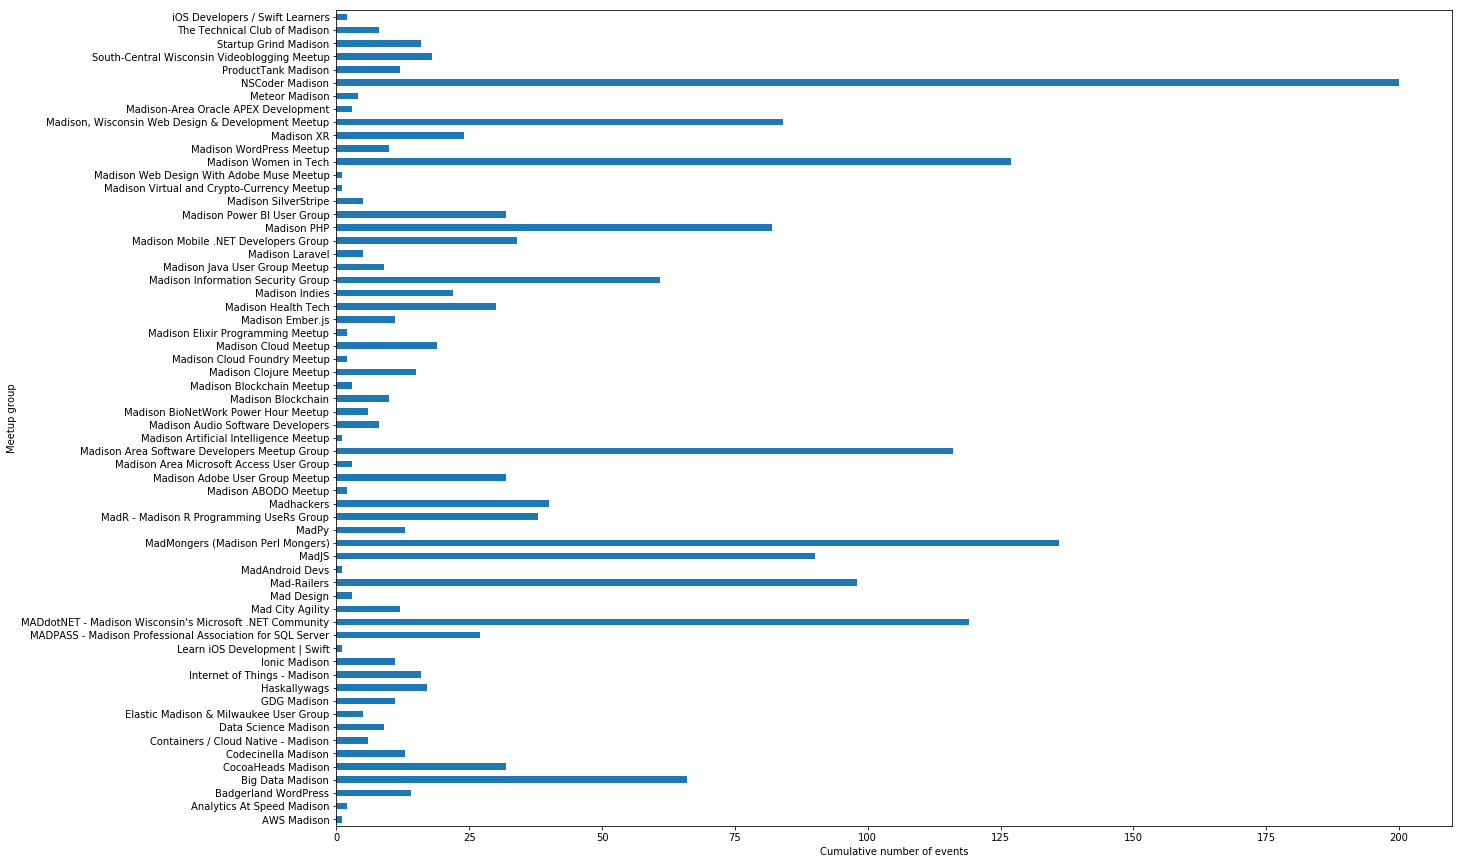

In [9]:
fig, ax = plt.subplots(figsize=(20, 15))
group_events.groupby('name').size().plot(kind='barh', color='C0', ax=ax)
ax.set_xlabel('Cumulative number of events')
ax.set_ylabel('Meetup group')
plt.show()